# 1번

## 1-1 insurance 데이터의 흡연 여부(smoker)에 따른 보험료(charges)의 분포 파악 위한 박스플롯을 그려주세요

조건1. matplotlib, seaborn 라이브러리를 각각 사용하여 그래프 총 2개를 그리고 간단한 해석도 함께 해주세요  
조건2. 수평 박스 플롯으로 그려주세요

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('./insurance.csv')

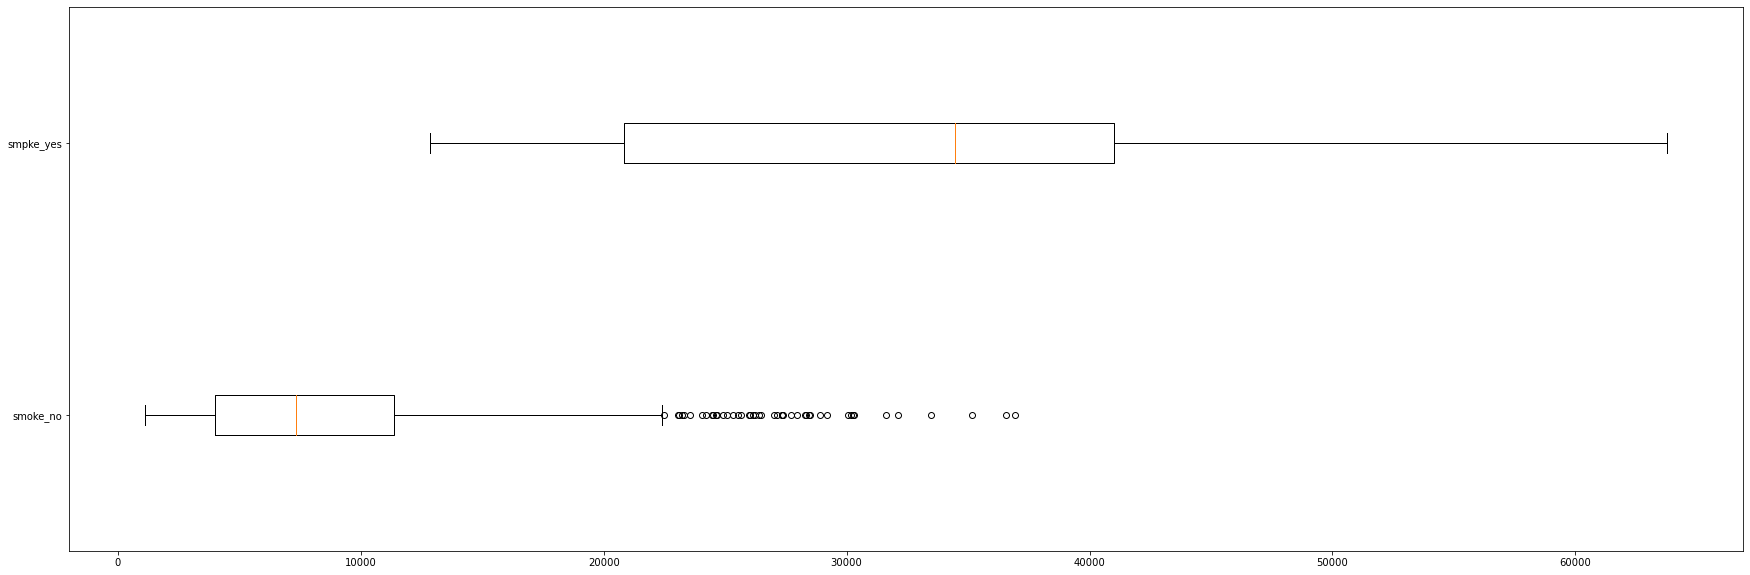

In [6]:
fig=plt.figure(figsize=(30,10))
plt.boxplot(x=[df[df['smoker']=='no']['charges'],df[df['smoker']=='yes']['charges']], labels=['smoke_no', 'smpke_yes'], vert=False)
plt.show()

- 흡연하는 경우의 보험료 평균> 흡연하지 않는 경우의 보험료 평균
- 흡연하지 않는 경우의 이상치 다수 존재
- 흡연할 경우, 하지 않는 경우 모두 우편향

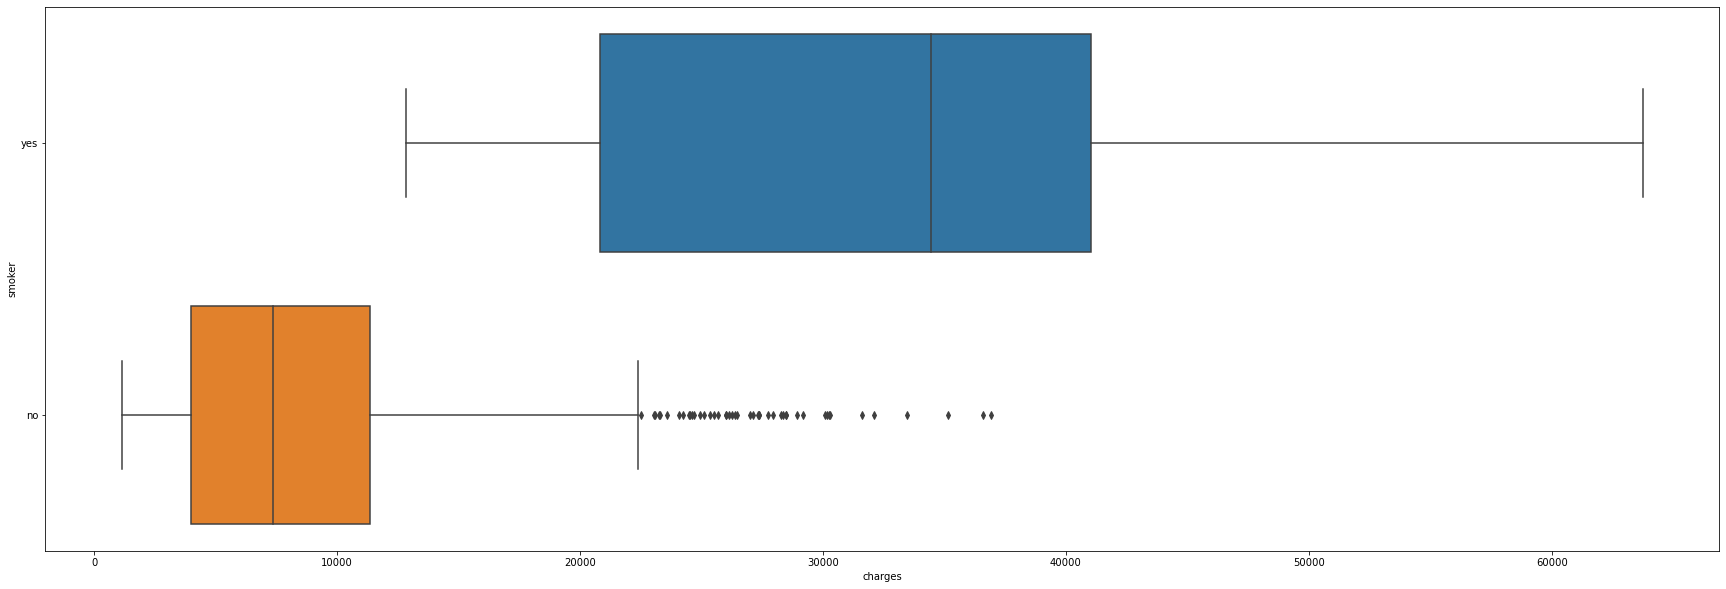

In [7]:
fig=plt.figure(figsize=(30,10))
sns.boxplot(x='charges',y='smoker', data=df)
plt.show()

## 1-2 위 그래프에 변수 'sex'를 추가해 색으로 구별하시오  
### (seaborn 라이브러리만 사용)

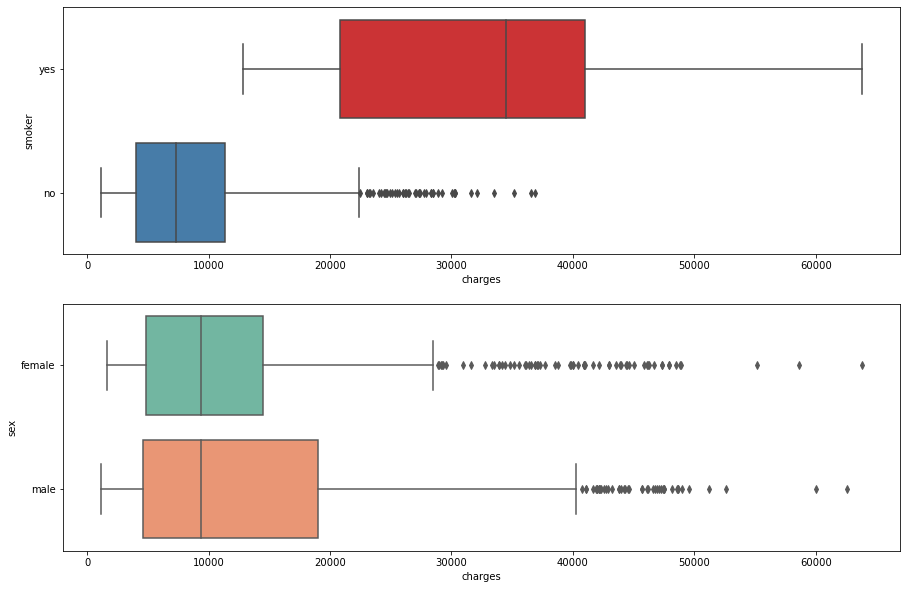

In [8]:
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)
sns.boxplot(x='charges',y='smoker', palette='Set1', data=df, ax=ax1)
sns.boxplot(x='charges',y='sex', palette='Set2',data=df,ax=ax2)
plt.show()

## 1-3 'smoker'의 범주별로 'charges'와 'bmi'의 회귀선 포함한 산점도를 그리세요 그리고 'sex'는 색으로 구분해주세요  


조건   FactGrid 사용  
힌트1. FacetGrid는 hue 옵션사용가능합니다  
힌트2. FacetGrid의 row, col 중 하나만 지정해도 그리드 생성됩니다

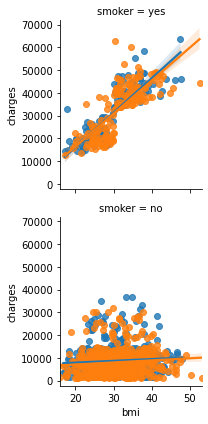

In [9]:
g=sns.FacetGrid(df, hue='sex', row='smoker')
g=g.map(sns.regplot,'bmi', 'charges')

# 2번
### 다음과 같은 파이차트를 만드시오.
* IPython패키지를 설치해주세요.(anaconda promt에서 !pip install IPython 입력!)  
조건1. Matplotlib의 함수를 이용하시오.(plt.pie)  
조건2. Premium의 explode은 0.1이다.  
조건3. explode, labels, colors, autopct, shadow, startangle 옵션을 사용하시오.

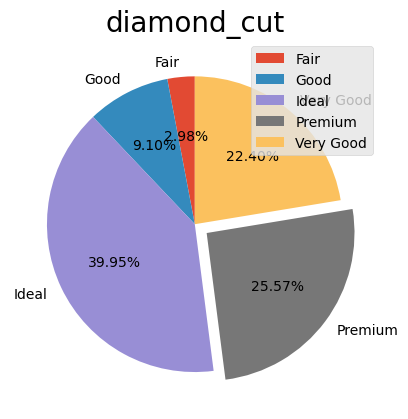

In [10]:
from IPython.display import Image

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./diamonds.csv')

Image('그림.png')

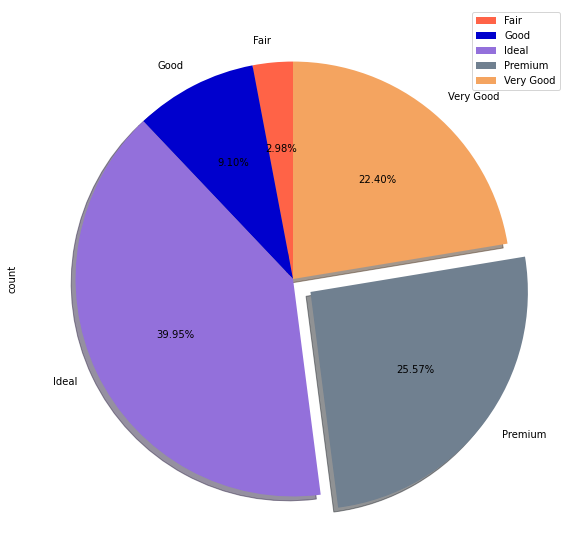

In [74]:
df['count']=1
df_cut=df.groupby('cut').sum()
df_cut['count'].plot(kind='pie', 
                     figsize=(10,10), 
                     autopct='%0.2f%%', 
                     startangle=90,
                     explode=[0,0,0,0.1,0],
                     labels=df_cut.index,
                     shadow=True,
                     colors=['tomato','mediumblue','mediumpurple','slategray','sandybrown'])
plt.legend(labels=df_cut.index, loc='upper right')

# 3번 버블차트 그리기

## 3-1 airpollution_2018 데이터에서 NaN가 어떤 열들에 존재하는지 보기 위해 데이터 정보를 출력해주세요.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('airpollution_2018.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1499 non-null   int64  
 1   city      1499 non-null   object 
 2   NO2       1499 non-null   float64
 3   O3        1415 non-null   float64
 4   CO2       1499 non-null   float64
 5   SO2       1499 non-null   float64
 6   finedust  1466 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 82.1+ KB


## 3-2 각 열의 NaN 값들을 해당 열의 평균값으로 바꿔주세요. (기존 데이터를 변경해주세요!)

In [83]:
mean_=df['O3'].mean()
mean_finedust=df['finedust'].mean()
df['O3'].fillna(mean_, inplace=True)
df['finedust'].fillna(mean_finedust, inplace=True)

## 3- 3 O3 열의 값들을 O3 열의 최댓값으로 나누어 준 상대적 비율을 O3_size라는 변수에 저장해주세요!
### 그리고 크기 조정을 위해 100을 곱해주세요

In [88]:
df['O3_size']=(df['O3']/df['O3'].max())*100

## 3-4 버블모양의 산점도를 그려주세요
#### (x축 : finedust, y축 : NO2, 색상 : skyblue, figsize : 가로 10pixel, 세로 5pixel, 크기 : O3_size, 투명도 : 0.3, plot 제목 : My Scatter Plot)

Text(0.5, 1.0, 'My Scatter Plot')

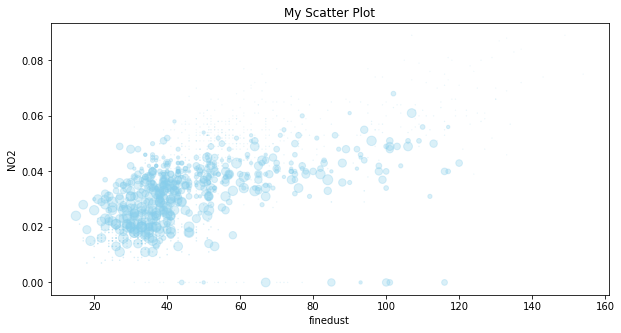

In [93]:
df.plot(kind='scatter', x='finedust', y='NO2', c='skyblue', figsize=(10,5), s=df['O3_size'], alpha=0.3)
plt.title('My Scatter Plot')

# 4. 데이터 타입과 그래프 타입 

Heights.csv 파일에는 ```6 개의 변수```를 가진 자료가 들어있다. 
+ ```earn``` : 연봉 (dollar)
+ ```height``` : 키 (inch)
+ ```sex``` : 성별
+ ```ed``` : 초등학교부터 교육을 받은 정도 (year)
+ ```age``` : 나이
+ ```race``` : 인종

아래의 각 항목을 알아보기 위해 적합한 ```그림```을 그리고 ```해석```하시오.

In [94]:
#matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"  #폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font_name)

In [107]:
import pandas as pd

df=pd.read_csv("heights.csv")
df.head(10)

,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white
5,9000.0,64.399508,female,15,26,white
6,29000.0,61.656326,female,12,49,white
7,32000.0,72.698544,male,17,46,white
8,2000.0,72.039467,male,15,21,hispanic
9,27000.0,72.234933,male,12,26,white


## 4-1. 연봉, 성별 변수 각각의 분포

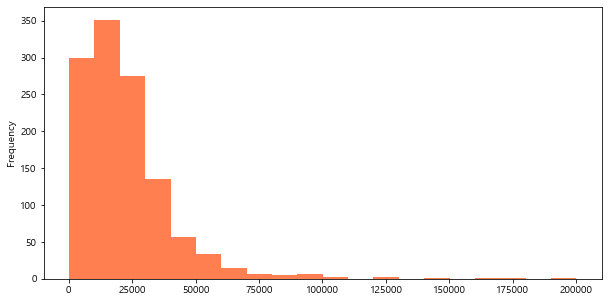

In [100]:
df['earn'].plot(kind='hist', bins=20, color='coral', figsize=(10,5))
plt.show()

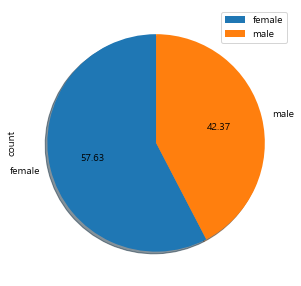

In [115]:
df['count']=1
df_sex=df.groupby('sex').sum()
df_sex['count'].plot(kind='pie', 
                     figsize=(5,5),  
                     startangle=90,
                     explode=[0,0],
                     labels=df_sex.index,
                     shadow=True,
                     colors=None,
                    autopct='%0.2f')
plt.legend(labels=df_sex.index, loc='upper right')

## 4-2. 성별에 따라 연봉의 차이가 있는가?

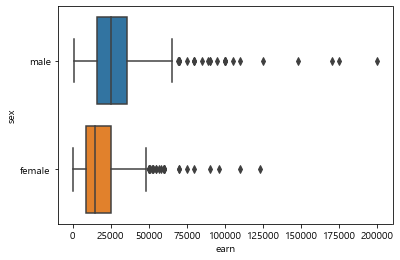

In [132]:
sns.boxplot(x='earn',y='sex', data=df)
#남성의 평균 연봉이 높음

## 4-3. 인종별로 연봉의 차이가 있는가?

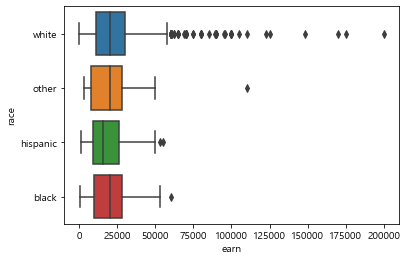

In [133]:
sns.boxplot(x='earn',y='race', data=df)
#백인의 평균 연봉이 높음

## 4-4. 연봉과 키가 관계가 있는가?

** 회귀선이 있는 그래프도 같이 그려보시오.

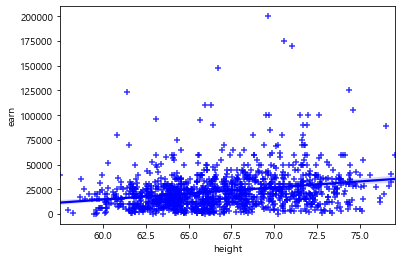

In [136]:
sns.regplot(x='height', y='earn', data=df, ci=95, color='blue', marker='+')
plt.show()
#유의미한 상관관계가 없다

## 4-5. 인종별로 성별에 따라 연봉차이가 있는가?

In [156]:
df['new_earn']=(df['earn']/df['earn'].max())*100

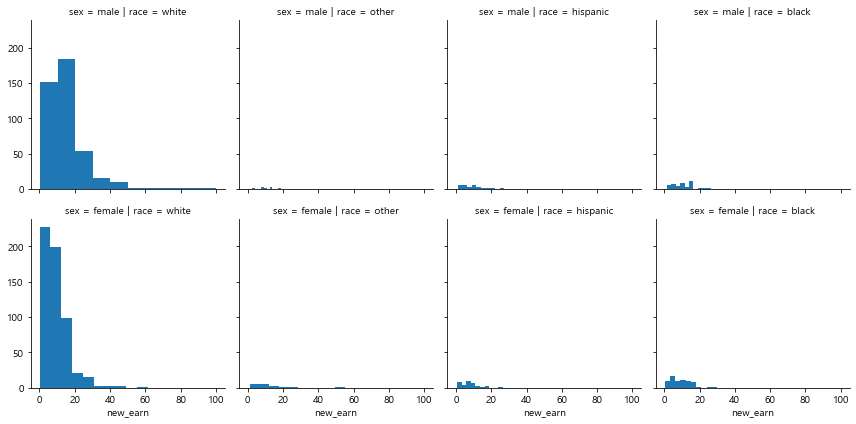

In [157]:
g=sns.FacetGrid(data=df, col='race', row='sex')
g=g.map(plt.hist, 'new_earn')
#백인에서 남성과 여성의 차이가 보이지만 다른 인종에서는 유의미한 차이가 보이지 않음